**Problem Statement**

**Customer churn prediction is to measure why customers are leaving a business. In this project I've built a customer churn deep learning model for telecom business along with precision,recall, f1-score to measure performance of our model. At the end also tackled the problem of Imbalanced data.**

In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
!pip install -q keras

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Getting the Dataset for our Problem**

In [277]:
df= pd.read_csv('/content/drive/MyDrive/DL/churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2611,5976-JCJRH,Male,0,Yes,No,10,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,738.2,Yes
3996,1395-WSWXR,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,487.05,No
2100,6227-FBDXH,Male,0,Yes,No,69,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),99.50,6841.45,No
4564,4877-EVATK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20,Yes
4448,6543-XRMYR,Female,1,No,No,30,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.70,2967.35,Yes


**Hypothesis Generation**

Are the variables related to cost, billing, network, and service quality making a significant contribution towards a customer’s decision to stay with or leave the service provider?

In [278]:
# customerID won't provide any information for ML.
df.drop('customerID', axis=1, inplace= True) 

**Data Preparation — Descriptive Analytics**

In [279]:
#pd.to_numeric(df.TotalCharges)

** Some values seems to be not numbers but blank string.**

In [280]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [281]:
df[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**As these are blank values, I've dropped them.**

In [282]:
df1= df[df.TotalCharges != ' ']
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [283]:
df1.shape

(7032, 20)

In [284]:
# Custom function to print unique categorical col values.
def cat_val(data):
  for col in data:
    if data[col].dtypes=='object':
      print(f'{col} : {data[col].unique()}')

In [285]:
cat_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Data Visualization**

*Univariate Analysis*

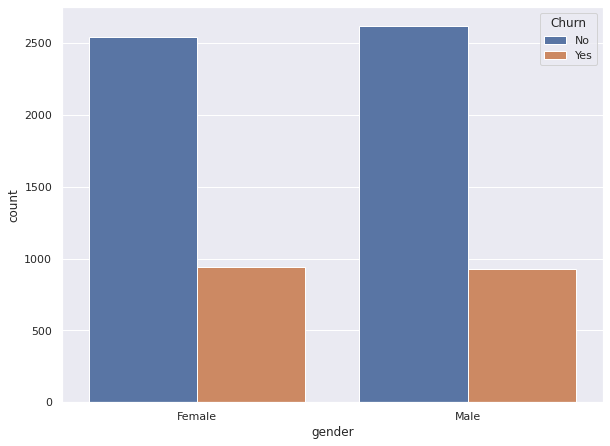

In [286]:
import seaborn as sns
sns.countplot('gender',data=df1,hue='Churn')

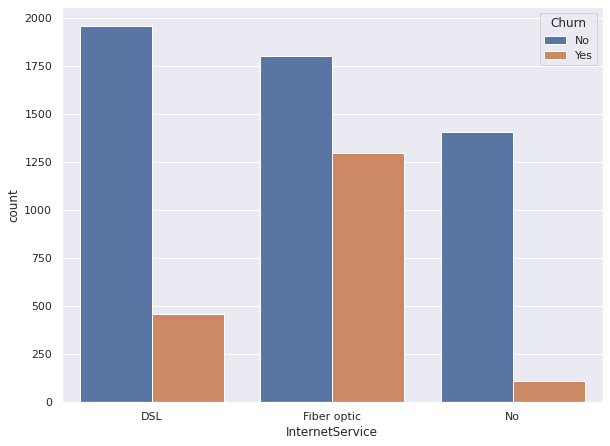

In [287]:
sns.countplot('InternetService',data=df1,hue='Churn')

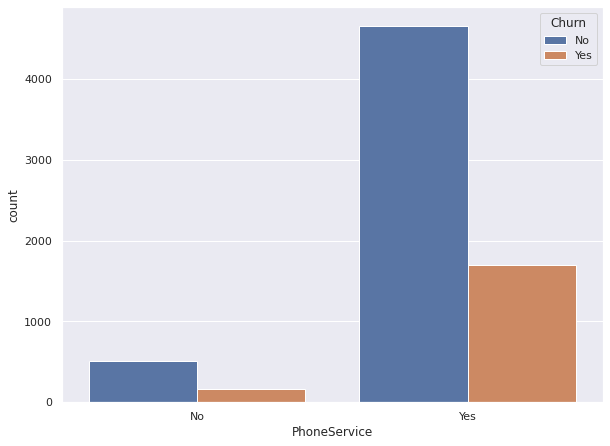

In [288]:
sns.countplot('PhoneService',data=df1,hue='Churn')

**So people were not satisfied with the Fibre Optic and Phone service and that's why there exists a majority in the churn rate for those customers.**

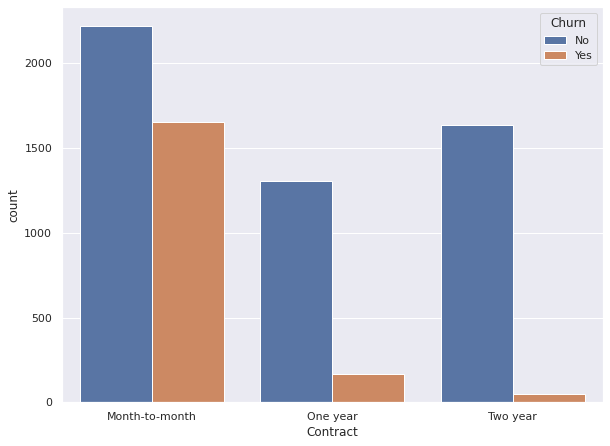

In [289]:
sns.countplot('Contract',data=df1,hue='Churn')

**So Basically the customers with m-t-m billing are more likely to churn out because they have just a month, on the other hand churn rate for customers with longer contracts is very low.**

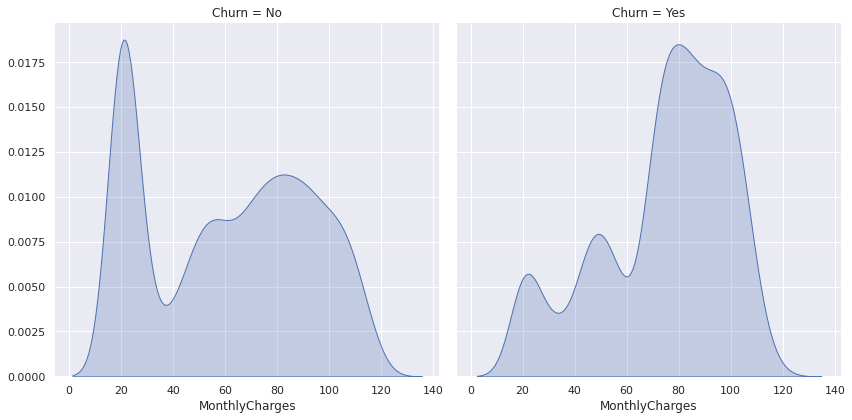

In [290]:
g= sns.FacetGrid(df1, col= 'Churn', height= 6)
g.map(sns.kdeplot, 'MonthlyCharges', shade= True) 
sns.despine(left= True, bottom= True)

**The Churn rate is drastically increases as monthly charges increases.**

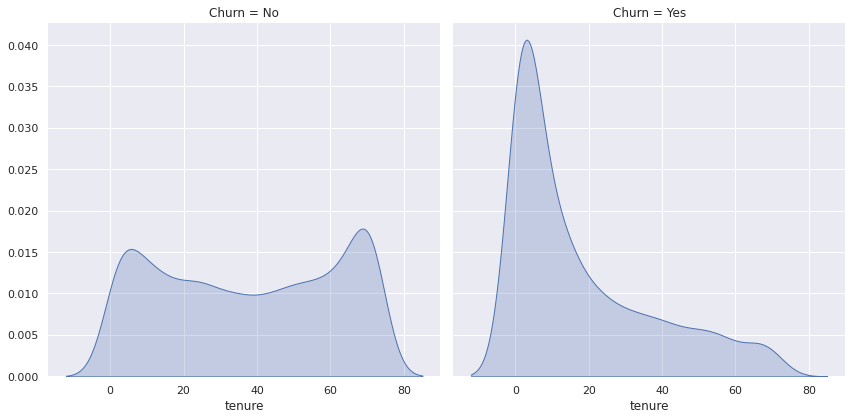

In [291]:
g= sns.FacetGrid(df1, col= 'Churn', height= 6)
g.map(sns.kdeplot, 'tenure', shade= True) 
sns.despine(left= True, bottom= True)


So customers with highest tenure are not leaving our company, it means
the Old Customer is more Loyal to the Company.

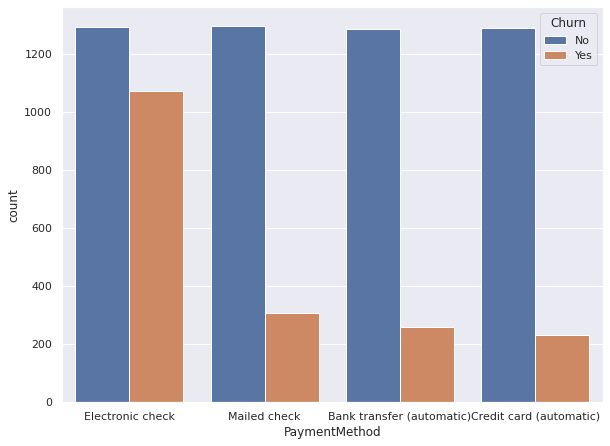

In [292]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9.7, 7.27)})
sns.countplot('PaymentMethod',data=df1,hue='Churn')

Customers with the Payment Method of Electronic check are mostly to churn out.

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [293]:
df1.replace({'No phone service': 'No'}, inplace= True)
df1.replace({'No internet service': 'No'}, inplace= True)

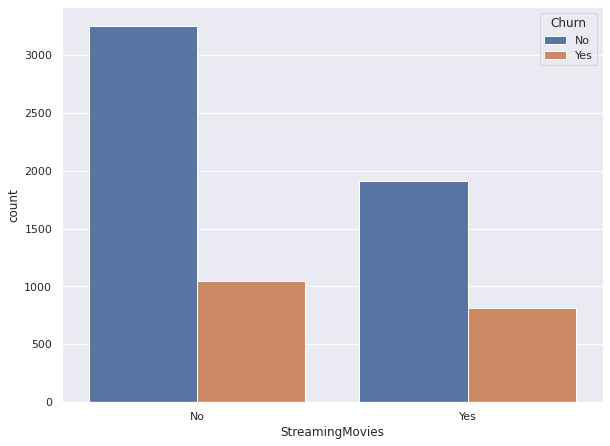

In [294]:
sns.countplot('StreamingMovies',data=df1,hue='Churn')

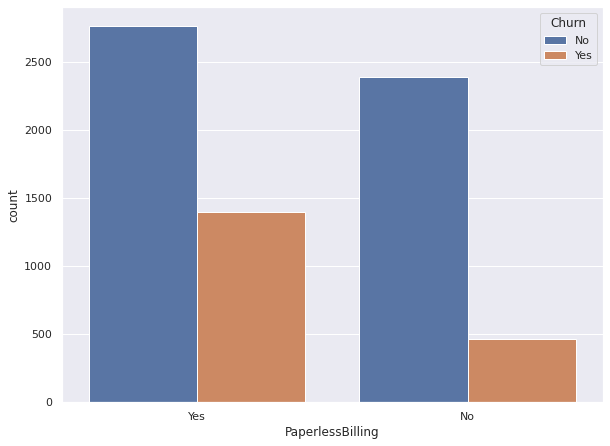

In [295]:
sns.countplot('PaperlessBilling',data=df1,hue='Churn')

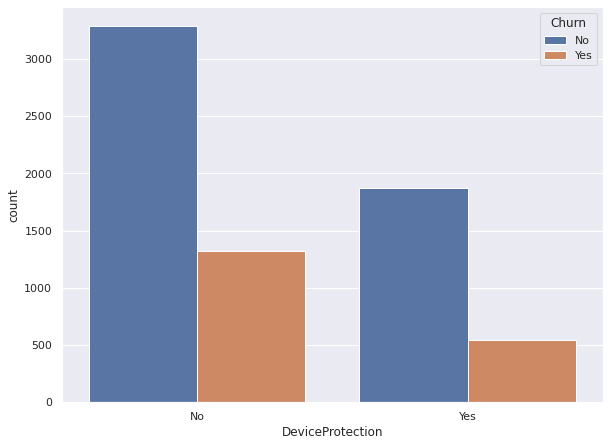

In [296]:
sns.countplot('DeviceProtection',data=df1,hue='Churn')

In [297]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [298]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [299]:
cat_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Categorical columns**

In [300]:
cols= ['InternetService','Contract','PaymentMethod']
df2= pd.get_dummies(data= df1, columns= cols)
df2.shape[1]

27

In [301]:
df2['gender'].replace({'Female':1, 'Male':0}, inplace= True)

In [302]:
yes_no_columns= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df2[col].replace({'Yes':1, 'No':0}, inplace= True)

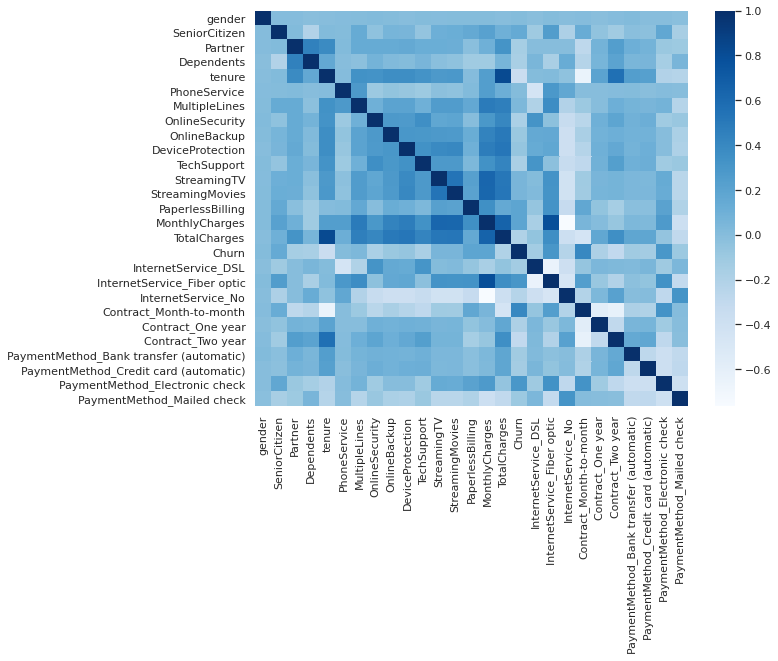

In [303]:
#We should handle the collinearity problem. This is because the presence of collinear variables always reduces the model’s performance since they introduce bias into the model.
#I have removed the highly correlated variables:
cm= df2.corr()
sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns, cmap="Blues")

In [304]:
df3= df2.drop(['TotalCharges','Partner'],axis='columns')
df3.shape

(7032, 25)

**Train test split**

In [305]:
X = df3.drop('Churn',axis='columns')
X.shape

(7032, 24)

In [306]:
y = df3['Churn']

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [308]:
X_train.shape

(5625, 24)

**Let's scale the values**

In [309]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

X_train= scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)

In [310]:
X_train[0]

array([ 0.99698233,  2.31119036, -0.65617809, -0.92000266,  0.32587527,
       -0.85953152, -0.63214072, -0.72471851,  1.37227434, -0.64317321,
       -0.79162037,  1.25333194,  0.83537831,  0.66074024, -0.72614567,
        1.14044443, -0.53122255,  0.91489596, -0.51689195, -0.56934396,
       -0.53672117,  1.92743461, -0.70795548, -0.5471529 ])

**Build a model (ANN) in Keras**

In [311]:
# from keras.layers import Dense
# from keras.models import Sequential
# model= Sequential()

In [312]:
# model.add(Dense(units= 10, kernel_initializer= 'he_uniform', activation='relu', input_dim=24))
# model.add(Dense(units= 6, kernel_initializer= 'he_uniform', activation='relu'))
# model.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation='sigmoid'))

In [313]:
# model.summary()

In [314]:
# model.compile(loss= 'binary_crossentropy',
#              metrics= ['accuracy'],
#              optimizer= 'adam'
#              )

In [315]:
# # Fitting the ANN to the Training set
# model.fit(X_train, y_train, validation_split=0.35, batch_size = 10, epochs = 100)

In [316]:
# model.evaluate(X_test,y_test)

In [317]:
# prediction= model.predict(X_test)

In [318]:
# y_pred= list()
# for i in prediction:
#   if i >=0.5:
#     y_pred.append(1)
#   else:
#     y_pred.append(0)

In [319]:
# y_pred[:5]

In [320]:
# y_test[:5]

In [321]:

# # Making the Confusion Matrix and Classification Report
# from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(y_test, y_pred)

In [322]:
# print(classification_report(y_test,y_pred))

In [323]:
# plt.figure(figsize = (10,7))
# sns.heatmap(cm, annot=True,  fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

**Imbalanced data**

In [324]:
df3[df3.Churn==0].shape

(5163, 25)

In [325]:
df3[df3.Churn==1].shape

(1869, 25)

As target column contains more No data than Yes, it creates our data imbalanced and also will behave horribly in reality. We want to improve f1-score for Yes data.

**SMOTE technique**

In [326]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

**ANN with balanced data**

In [328]:
# classifier= Sequential()
# classifier.add(Dense(units= 10, kernel_initializer= 'he_uniform', activation='relu', input_dim=24))
# classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform', activation='relu'))
# classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation='sigmoid'))
# classifier.summary()

In [329]:
# classifier.compile(loss= 'binary_crossentropy',
#              metrics= ['accuracy'],
#              optimizer= 'adam'
#              )

In [330]:
# # Fitting the ANN to the Training set
# classifier.fit(X_train, y_train, validation_split=0.35, batch_size = 10, epochs = 100)

In [331]:
# predictions= classifier.predict(X_test)
# predictions[:5]

In [332]:
# pred= list()
# for i in predictions:
#   if i >=0.5:
#     pred.append(1)
#   else:
#     pred.append(0)

# pred[:5]    

In [333]:
# cm_smote= confusion_matrix(y_test,pred)
# cm_smote

In [334]:
# print(classification_report(y_test,pred))


**Although accuracy is just increased by 1% but ovearll f1-score for both Yes and No values have been improved and that is needed.**

**Recommendations to improve performance — Prescriptive Analytics**

So The Company should Improve their Internet Service(Optical Fibre) and Phone Service like Give customers cheaper plans than other competitors.As well as push schemes to m-t-m billing customers as they are more likely to switch networks.

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model= LogisticRegression()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
    
print('Accuracy of Logistic Regression model is:', metrics.accuracy_score(y_test, predictions))
print('Error of Logistic Regression model is:', metrics.mean_squared_error(y_test, predictions))

Accuracy of Logistic Regression model is: 0.7710551790900291
Error of Logistic Regression model is: 0.22894482090997095


In [336]:
print(model.coef_, model.intercept_)

[[ 0.01119431  0.16759501 -0.20864647 -0.03060037 -0.82768808  0.27449736
  -0.5309223  -0.25049184 -0.09519253 -0.39121683  0.17527834  0.13883317
   0.34802847  0.01467922 -0.07592664  0.42947717 -0.48966333  0.71310703
  -0.13302688 -0.71619296 -0.13610328 -0.20811998  0.28446137 -0.07635092]] [-0.14151174]


In [337]:
import numpy as np

odds= np.exp(model.coef_)
Probability = odds/(1+odds)
Probability

array([[0.50279855, 0.54180096, 0.44802679, 0.4923505 , 0.30413413,
        0.56819666, 0.3703018 , 0.43770244, 0.47621982, 0.40342441,
        0.54370774, 0.53465265, 0.58613941, 0.50366974, 0.48102745,
        0.60574881, 0.37997288, 0.67108734, 0.46679224, 0.32823187,
        0.46602661, 0.448157  , 0.57063965, 0.48092154]])

In [338]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

Based on the probabilities and Hypothesis that I've generated the factors like 
**'Contract_Month-to-month'**, **'PaperlessBilling'**, **'InternetService_Fiber optic'**, **'PaymentMethod_Electronic check'**, **'MonthlyCharges'** and **'MultipleLines'** are highly signaficant.

**The variables related to cost, billing, network, and service quality making a significant contribution towards a customer’s decision to stay with or leave the service provider.**

So The Company should Improve their Internet Service(Optical Fibre) and Phone Service like Give customers cheaper plans than other competitors.As well as push schemes to m-t-m billing customers as they are more likely to switch networks.